*   initial libs and check for missing values
*   reverse ordering of dataFrame rows and reset index
*   convert date column format
*   Visualizing bitcoin data
*   building random forest mode

# initial libs and check for missing values

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

plt.style.use('seaborn-darkgrid')
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BitcoinHistoricalDataInvesting.csv'

df=pd.read_csv(path)

Mounted at /content/drive


In [3]:
df.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

# reverse ordering of dataFrame rows and reset index

In [4]:
df = df[::-1].reset_index(drop = True) 

# convert date column format

In [5]:
df['Date']= df['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))

In [6]:
df.rename({'Price':'Close'}, axis=1 , inplace=True)
btc = df.copy()
btc.drop(['Date','Vol.','Change %'], axis=1 , inplace=True)
btc.head()

,Close,Open,High,Low
0,0.1,0.0,0.1,0.1
1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1


In [7]:
btc.shape

(3941, 4)

# Visualizing bitcoin data

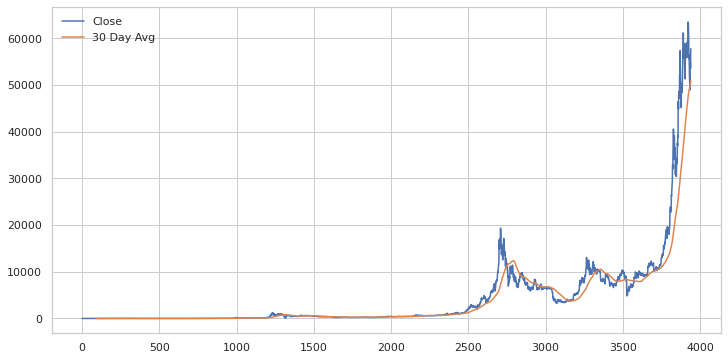

In [8]:
sns.set()
sns.set_style('whitegrid')
btc['Close'].plot(figsize=(12,6),label='Close')
btc['Close'].rolling(window=100).mean().plot(label='30 Day Avg')
plt.legend()

Add one feature to average 4 kandel price

In [9]:
btc['ohlc_average'] = (btc['Open'] + btc['High'] + btc['Low'] + btc['Close']) / 4

In [10]:
btc['Price_After_Month']=btc['Close'].shift(-30)

# building random forest model

In [11]:
from sklearn import preprocessing
btc.dropna(inplace=True)
X=btc.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)
y=btc['Price_After_Month']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

This percentage shows how much our regression fits our data

In [13]:
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 96.3264 %
